In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data.head(10)
crop_data.tail(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.0
246082,West Bengal,PURULIA,2014,Rabi,Safflower,54.0,37.0
246083,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.0
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [3]:
crop_data.shape

(246091, 7)

In [4]:
# prompt: generate unique state_names

len(crop_data['State_Name'].unique())


33

In [5]:
len(crop_data['District_Name'].unique())

646

In [6]:
len(crop_data['Season'].unique())

6

In [7]:
len(crop_data['Crop'].unique())

124

In [8]:
crop_data.shape

(246091, 7)

In [9]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [10]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [11]:
crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [12]:
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [13]:
# prompt: drop all  the null rows

crop_data = crop_data.dropna()


In [14]:
crop_data.isnull().values.any()

False

In [15]:
crop_data.shape

(242361, 7)

In [16]:
#crop_data.to_csv("BeforePreprocessed.csv",index=False)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()
crop_data['State_Name'] = label_encoder.fit_transform(crop_data['State_Name'])
crop_data['District_Name'] = label_encoder.fit_transform(crop_data['District_Name'])
crop_data['Season'] = label_encoder.fit_transform(crop_data['Season'])
crop_data['Crop'] = label_encoder.fit_transform(crop_data['Crop'])

In [19]:
X = crop_data.drop('Production', axis=1)
X


,State_Name,District_Name,Crop_Year,Season,Crop,Area
0,0,427,2000,1,2,1254.0
1,0,427,2000,1,74,2.0
2,0,427,2000,1,95,102.0
3,0,427,2000,4,7,176.0
4,0,427,2000,4,22,720.0
...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0
246087,32,471,2014,3,102,627.0
246088,32,471,2014,4,106,324.0
246089,32,471,2014,5,95,279151.0


In [20]:
#crop_data.to_csv("Preprocessed.csv",index=False)

In [21]:
y = crop_data['Production']
y

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 242361, dtype: float64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 6)
x_test : (60591, 6)
y_train : (181770,)
y_test : (60591,)


**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

dtc_reg = DecisionTreeRegressor()
dtc_reg.fit(X_train, y_train)
y_pred = dtc_reg.predict(X_test)
d_mse = mean_squared_error(y_test, y_pred)
d_rmse = np.sqrt(d_mse)
d_mae=mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE) for Decision Tree is {:.3f} \n".format(d_mse))
print("Root Mean Squared Error (RMSE) for Decision Tree is {:.3f} \n".format(d_rmse))
print("Mean Absolute Error (MAE) for Decision Tree is {:.3f} \n".format(d_mae))


Mean Squared Error (MSE) for Decision Tree is 59230754934993.188 

Root Mean Squared Error (RMSE) for Decision Tree is 7696151.956 

Mean Absolute Error (MAE) for Decision Tree is 123980.552 



**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor

rd_reg = RandomForestRegressor()
rd_reg.fit(X_train, y_train)
r_pred=rd_reg.predict(X_test)

r_mse = mean_squared_error(y_test, r_pred)
r_rmse = np.sqrt(r_mse)
r_mae=mean_absolute_error(y_test, r_pred)
print("Mean Squared Error (MSE) for Random Forest is {:.3f} \n".format(r_mse))
print("Root Mean Squared Error (RMSE) for Random Forest is {:.3f} \n".format(r_rmse))
print("Mean Absolute Error (MAE) for Random Forest is {:.3f} \n".format(r_mae))

Mean Squared Error (MSE) for Random Forest is 26930984137411.977 

Root Mean Squared Error (RMSE) for Random Forest is 5189507.119 

Mean Absolute Error (MAE) for Random Forest is 107801.988 



**KNN**

In [25]:
from sklearn.neighbors import KNeighborsRegressor


knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
k_pred=knn_reg.predict(X_test)



k_mse = mean_squared_error(y_test, k_pred)
k_rmse = np.sqrt(k_mse)
k_mae=mean_absolute_error(y_test, k_pred)
print("Mean Squared Error (MSE) for KNN is {:.3f} \n".format(k_mse))
print("Root Mean Squared Error (RMSE) for KNN is {:.3f} \n".format(k_rmse))
print("Mean Absolute Error (MAE) for KNN is {:.3f} \n".format(k_mae))


Mean Squared Error (MSE) for KNN is 249193469937622.156 

Root Mean Squared Error (RMSE) for KNN is 15785862.977 

Mean Absolute Error (MAE) for KNN is 946747.249 



In [26]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree', 'Random Forest'],
    'MSE' : [k_mse,d_mse, r_mse]
})


models_sorted=models.sort_values(by = 'MSE', ascending = True)
models_sorted

,Model,MSE
2,Random Forest,2.693098e+13
1,Decision Tree,5.923075e+13
0,KNN,2.491935e+14


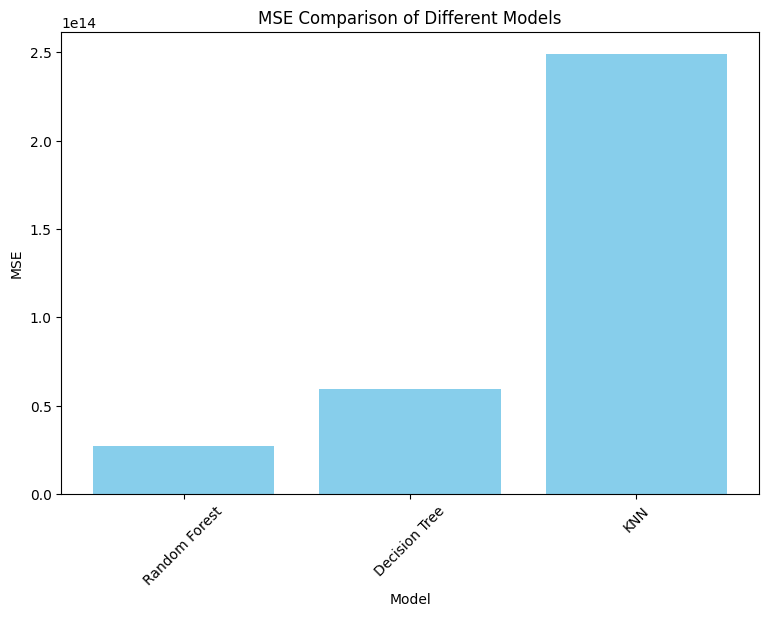

In [27]:
plt.figure(figsize=(9, 6))
plt.bar(models_sorted['Model'], models_sorted['MSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison of Different Models')
plt.xticks(rotation=45)
plt.show()

In [28]:
import pickle
pickle.dump(rd_reg,open('RandomforestReg_pkl','wb'))

In [29]:
dtpickle = pickle.load(open('RandomforestReg_pkl','rb'))


In [30]:
State_dict={'Andaman and Nicobar Islands': 0,
 'Andhra Pradesh': 1,
 'Arunachal Pradesh': 2,
 'Assam': 3,
 'Bihar': 4,
 'Chandigarh': 5,
 'Chhattisgarh': 6,
 'Dadra and Nagar Haveli': 7,
 'Goa': 8,
 'Gujarat': 9,
 'Haryana': 10,
 'Himachal Pradesh': 11,
 'Jammu and Kashmir ': 12,
 'Jharkhand': 13,
 'Karnataka': 14,
 'Kerala': 15,
 'Madhya Pradesh': 16,
 'Maharashtra': 17,
 'Manipur': 18,
 'Meghalaya': 19,
 'Mizoram': 20,
 'Nagaland': 21,
 'Odisha': 22,
 'Puducherry': 23,
 'Punjab': 24,
 'Rajasthan': 25,
 'Sikkim': 26,
 'Tamil Nadu': 27,
 'Telangana ': 28,
 'Tripura': 29,
 'Uttar Pradesh': 30,
 'Uttarakhand': 31,
 'West Bengal': 32}

In [31]:
District_dict={'NICOBARS': 427,
 'NORTH AND MIDDLE ANDAMAN': 429,
 'SOUTH ANDAMANS': 559,
 'ANANTAPUR': 24,
 'CHITTOOR': 122,
 'EAST GODAVARI': 172,
 'GUNTUR': 217,
 'KADAPA': 274,
 'KRISHNA': 335,
 'KURNOOL': 340,
 'PRAKASAM': 463,
 'SPSR NELLORE': 566,
 'SRIKAKULAM': 567,
 'VISAKHAPATANAM': 625,
 'VIZIANAGARAM': 626,
 'WEST GODAVARI': 633,
 'ANJAW': 26,
 'CHANGLANG': 113,
 'DIBANG VALLEY': 157,
 'EAST KAMENG': 174,
 'EAST SIANG': 176,
 'KURUNG KUMEY': 342,
 'LOHIT': 353,
 'LONGDING': 354,
 'LOWER DIBANG VALLEY': 356,
 'LOWER SUBANSIRI': 357,
 'NAMSAI': 415,
 'PAPUM PARE': 446,
 'TAWANG': 580,
 'TIRAP': 593,
 'UPPER SIANG': 613,
 'UPPER SUBANSIRI': 614,
 'WEST KAMENG': 635,
 'WEST SIANG': 637,
 'BAKSA': 41,
 'BARPETA': 64,
 'BONGAIGAON': 95,
 'CACHAR': 103,
 'CHIRANG': 119,
 'DARRANG': 137,
 'DHEMAJI': 152,
 'DHUBRI': 155,
 'DIBRUGARH': 158,
 'DIMA HASAO': 159,
 'GOALPARA': 206,
 'GOLAGHAT': 208,
 'HAILAKANDI': 221,
 'JORHAT': 270,
 'KAMRUP': 278,
 'KAMRUP METRO': 279,
 'KARBI ANGLONG': 292,
 'KARIMGANJ': 294,
 'KOKRAJHAR': 322,
 'LAKHIMPUR': 345,
 'MARIGAON': 381,
 'NAGAON': 406,
 'NALBARI': 412,
 'SIVASAGAR': 551,
 'SONITPUR': 558,
 'TINSUKIA': 592,
 'UDALGURI': 603,
 'ARARIA': 29,
 'ARWAL': 31,
 'AURANGABAD': 34,
 'BANKA': 53,
 'BEGUSARAI': 70,
 'BHAGALPUR': 77,
 'BHOJPUR': 85,
 'BUXAR': 102,
 'DARBHANGA': 135,
 'GAYA': 202,
 'GOPALGANJ': 212,
 'JAMUI': 257,
 'JEHANABAD': 261,
 'KAIMUR (BHABUA)': 275,
 'KATIHAR': 301,
 'KHAGARIA': 306,
 'KISHANGANJ': 317,
 'LAKHISARAI': 346,
 'MADHEPURA': 361,
 'MADHUBANI': 362,
 'MUNGER': 399,
 'MUZAFFARPUR': 402,
 'NALANDA': 411,
 'NAWADA': 423,
 'PASHCHIM CHAMPARAN': 448,
 'PATNA': 453,
 'PURBI CHAMPARAN': 468,
 'PURNIA': 470,
 'ROHTAS': 498,
 'SAHARSA': 505,
 'SAMASTIPUR': 509,
 'SARAN': 518,
 'SHEIKHPURA': 531,
 'SHEOHAR': 532,
 'SITAMARHI': 548,
 'SIWAN': 552,
 'SUPAUL': 572,
 'VAISHALI': 618,
 'CHANDIGARH': 111,
 'BALOD': 46,
 'BALODA BAZAR': 47,
 'BALRAMPUR': 48,
 'BASTAR': 66,
 'BEMETARA': 73,
 'BIJAPUR': 88,
 'BILASPUR': 91,
 'DANTEWADA': 134,
 'DHAMTARI': 147,
 'DURG': 169,
 'GARIYABAND': 200,
 'JANJGIR-CHAMPA': 258,
 'JASHPUR': 259,
 'KABIRDHAM': 272,
 'KANKER': 283,
 'KONDAGAON': 327,
 'KORBA': 330,
 'KOREA': 331,
 'MAHASAMUND': 365,
 'MUNGELI': 398,
 'NARAYANPUR': 418,
 'RAIGARH': 475,
 'RAIPUR': 476,
 'RAJNANDGAON': 481,
 'SUKMA': 569,
 'SURAJPUR': 573,
 'SURGUJA': 576,
 'DADRA AND NAGAR HAVELI': 130,
 'NORTH GOA': 432,
 'SOUTH GOA': 562,
 'AHMADABAD': 5,
 'AMRELI': 20,
 'ANAND': 23,
 'BANAS KANTHA': 49,
 'BHARUCH': 80,
 'BHAVNAGAR': 81,
 'DANG': 133,
 'DOHAD': 166,
 'GANDHINAGAR': 196,
 'JAMNAGAR': 255,
 'JUNAGADH': 271,
 'KACHCHH': 273,
 'KHEDA': 310,
 'MAHESANA': 369,
 'NARMADA': 419,
 'NAVSARI': 422,
 'PANCH MAHALS': 442,
 'PATAN': 449,
 'PORBANDAR': 462,
 'RAJKOT': 480,
 'SABAR KANTHA': 502,
 'SURAT': 574,
 'SURENDRANAGAR': 575,
 'TAPI': 578,
 'VADODARA': 617,
 'VALSAD': 619,
 'AMBALA': 16,
 'BHIWANI': 84,
 'FARIDABAD': 183,
 'FATEHABAD': 186,
 'GURGAON': 219,
 'HISAR': 233,
 'JHAJJAR': 263,
 'JIND': 268,
 'KAITHAL': 276,
 'KARNAL': 296,
 'KURUKSHETRA': 341,
 'MAHENDRAGARH': 368,
 'MEWAT': 389,
 'PALWAL': 441,
 'PANCHKULA': 443,
 'PANIPAT': 444,
 'REWARI': 495,
 'ROHTAK': 497,
 'SIRSA': 547,
 'SONIPAT': 557,
 'YAMUNANAGAR': 642,
 'CHAMBA': 105,
 'HAMIRPUR': 222,
 'KANGRA': 282,
 'KINNAUR': 315,
 'KULLU': 338,
 'LAHUL AND SPITI': 344,
 'MANDI': 376,
 'SHIMLA': 534,
 'SIRMAUR': 545,
 'SOLAN': 553,
 'UNA': 610,
 'ANANTNAG': 25,
 'BADGAM': 36,
 'BANDIPORA': 51,
 'BARAMULLA': 57,
 'DODA': 165,
 'GANDERBAL': 195,
 'JAMMU': 254,
 'KARGIL': 293,
 'KATHUA': 300,
 'KISHTWAR': 318,
 'KULGAM': 337,
 'KUPWARA': 339,
 'LEH LADAKH': 351,
 'POONCH': 461,
 'PULWAMA': 466,
 'RAJAURI': 478,
 'RAMBAN': 485,
 'REASI': 493,
 'SAMBA': 510,
 'SHOPIAN': 537,
 'SRINAGAR': 568,
 'UDHAMPUR': 605,
 'BOKARO': 94,
 'CHATRA': 114,
 'DEOGHAR': 143,
 'DHANBAD': 148,
 'DUMKA': 167,
 'EAST SINGHBUM': 177,
 'GARHWA': 199,
 'GIRIDIH': 205,
 'GODDA': 207,
 'GUMLA': 215,
 'HAZARIBAGH': 231,
 'JAMTARA': 256,
 'KHUNTI': 314,
 'KODERMA': 320,
 'LATEHAR': 348,
 'LOHARDAGA': 352,
 'PAKUR': 436,
 'PALAMU': 438,
 'RAMGARH': 486,
 'RANCHI': 488,
 'SAHEBGANJ': 506,
 'SARAIKELA KHARSAWAN': 517,
 'SIMDEGA': 542,
 'WEST SINGHBHUM': 638,
 'BAGALKOT': 37,
 'BANGALORE RURAL': 52,
 'BELGAUM': 71,
 'BELLARY': 72,
 'BENGALURU URBAN': 74,
 'BIDAR': 87,
 'CHAMARAJANAGAR': 104,
 'CHIKBALLAPUR': 117,
 'CHIKMAGALUR': 118,
 'CHITRADURGA': 120,
 'DAKSHIN KANNAD': 131,
 'DAVANGERE': 140,
 'DHARWAD': 151,
 'GADAG': 192,
 'GULBARGA': 214,
 'HASSAN': 228,
 'HAVERI': 230,
 'KODAGU': 319,
 'KOLAR': 323,
 'KOPPAL': 328,
 'MANDYA': 379,
 'MYSORE': 403,
 'RAICHUR': 473,
 'RAMANAGARA': 483,
 'SHIMOGA': 535,
 'TUMKUR': 600,
 'UDUPI': 606,
 'UTTAR KANNAD': 615,
 'YADGIR': 641,
 'ALAPPUZHA': 10,
 'ERNAKULAM': 178,
 'IDUKKI': 239,
 'KANNUR': 286,
 'KASARAGOD': 298,
 'KOLLAM': 326,
 'KOTTAYAM': 333,
 'KOZHIKODE': 334,
 'MALAPPURAM': 372,
 'PALAKKAD': 437,
 'PATHANAMTHITTA': 450,
 'THIRUVANANTHAPURAM': 587,
 'THRISSUR': 590,
 'WAYANAD': 630,
 'AGAR MALWA': 3,
 'ALIRAJPUR': 12,
 'ANUPPUR': 28,
 'ASHOKNAGAR': 32,
 'BALAGHAT': 42,
 'BARWANI': 65,
 'BETUL': 75,
 'BHIND': 83,
 'BHOPAL': 86,
 'BURHANPUR': 101,
 'CHHATARPUR': 115,
 'CHHINDWARA': 116,
 'DAMOH': 132,
 'DATIA': 138,
 'DEWAS': 145,
 'DHAR': 149,
 'DINDORI': 164,
 'GUNA': 216,
 'GWALIOR': 220,
 'HARDA': 225,
 'HOSHANGABAD': 235,
 'INDORE': 242,
 'JABALPUR': 243,
 'JHABUA': 262,
 'KATNI': 302,
 'KHANDWA': 308,
 'KHARGONE': 309,
 'MANDLA': 377,
 'MANDSAUR': 378,
 'MORENA': 395,
 'NARSINGHPUR': 420,
 'NEEMUCH': 426,
 'PANNA': 445,
 'RAISEN': 477,
 'RAJGARH': 479,
 'RATLAM': 490,
 'REWA': 494,
 'SAGAR': 503,
 'SATNA': 520,
 'SEHORE': 522,
 'SEONI': 524,
 'SHAHDOL': 527,
 'SHAJAPUR': 529,
 'SHEOPUR': 533,
 'SHIVPURI': 536,
 'SIDHI': 540,
 'SINGRAULI': 544,
 'TIKAMGARH': 591,
 'UJJAIN': 607,
 'UMARIA': 609,
 'VIDISHA': 622,
 'AHMEDNAGAR': 6,
 'AKOLA': 9,
 'AMRAVATI': 19,
 'BEED': 69,
 'BHANDARA': 78,
 'BULDHANA': 99,
 'CHANDRAPUR': 112,
 'DHULE': 156,
 'GADCHIROLI': 193,
 'GONDIA': 211,
 'HINGOLI': 232,
 'JALGAON': 250,
 'JALNA': 251,
 'KOLHAPUR': 325,
 'LATUR': 349,
 'MUMBAI': 397,
 'NAGPUR': 409,
 'NANDED': 416,
 'NANDURBAR': 417,
 'NASHIK': 421,
 'OSMANABAD': 435,
 'PALGHAR': 439,
 'PARBHANI': 447,
 'PUNE': 467,
 'RAIGAD': 474,
 'RATNAGIRI': 491,
 'SANGLI': 513,
 'SATARA': 519,
 'SINDHUDURG': 543,
 'SOLAPUR': 554,
 'THANE': 582,
 'WARDHA': 628,
 'WASHIM': 629,
 'YAVATMAL': 644,
 'BISHNUPUR': 93,
 'CHANDEL': 110,
 'CHURACHANDPUR': 124,
 'IMPHAL EAST': 240,
 'IMPHAL WEST': 241,
 'SENAPATI': 523,
 'TAMENGLONG': 577,
 'THOUBAL': 589,
 'UKHRUL': 608,
 'EAST GARO HILLS': 171,
 'EAST JAINTIA HILLS': 173,
 'EAST KHASI HILLS': 175,
 'NORTH GARO HILLS': 431,
 'RI BHOI': 496,
 'SOUTH GARO HILLS': 561,
 'SOUTH WEST GARO HILLS': 564,
 'SOUTH WEST KHASI HILLS': 565,
 'WEST GARO HILLS': 632,
 'WEST JAINTIA HILLS': 634,
 'WEST KHASI HILLS': 636,
 'AIZAWL': 7,
 'CHAMPHAI': 108,
 'KOLASIB': 324,
 'LAWNGTLAI': 350,
 'LUNGLEI': 360,
 'MAMIT': 375,
 'SAIHA': 507,
 'SERCHHIP': 526,
 'DIMAPUR': 160,
 'KIPHIRE': 316,
 'KOHIMA': 321,
 'LONGLENG': 355,
 'MOKOKCHUNG': 392,
 'MON': 393,
 'PEREN': 456,
 'PHEK': 457,
 'TUENSANG': 599,
 'WOKHA': 640,
 'ZUNHEBOTO': 645,
 'ANUGUL': 27,
 'BALANGIR': 43,
 'BALESHWAR': 44,
 'BARGARH': 61,
 'BHADRAK': 76,
 'BOUDH': 96,
 'CUTTACK': 129,
 'DEOGARH': 142,
 'DHENKANAL': 153,
 'GAJAPATI': 194,
 'GANJAM': 198,
 'JAGATSINGHAPUR': 244,
 'JAJAPUR': 247,
 'JHARSUGUDA': 266,
 'KALAHANDI': 277,
 'KANDHAMAL': 281,
 'KENDRAPARA': 304,
 'KENDUJHAR': 305,
 'KHORDHA': 312,
 'KORAPUT': 329,
 'MALKANGIRI': 374,
 'MAYURBHANJ': 384,
 'NABARANGPUR': 404,
 'NAYAGARH': 425,
 'NUAPADA': 434,
 'PURI': 469,
 'RAYAGADA': 492,
 'SAMBALPUR': 511,
 'SONEPUR': 556,
 'SUNDARGARH': 571,
 'KARAIKAL': 290,
 'MAHE': 367,
 'PONDICHERRY': 460,
 'YANAM': 643,
 'AMRITSAR': 21,
 'BARNALA': 63,
 'BATHINDA': 68,
 'FARIDKOT': 184,
 'FATEHGARH SAHIB': 187,
 'FAZILKA': 189,
 'FIROZEPUR': 191,
 'GURDASPUR': 218,
 'HOSHIARPUR': 236,
 'JALANDHAR': 248,
 'KAPURTHALA': 289,
 'LUDHIANA': 359,
 'MANSA': 380,
 'MOGA': 391,
 'MUKTSAR': 396,
 'NAWANSHAHR': 424,
 'PATHANKOT': 451,
 'PATIALA': 452,
 'RUPNAGAR': 500,
 'S.A.S NAGAR': 501,
 'SANGRUR': 514,
 'TARN TARAN': 579,
 'AJMER': 8,
 'ALWAR': 15,
 'BANSWARA': 55,
 'BARAN': 58,
 'BARMER': 62,
 'BHARATPUR': 79,
 'BHILWARA': 82,
 'BIKANER': 90,
 'BUNDI': 100,
 'CHITTORGARH': 123,
 'CHURU': 125,
 'DAUSA': 139,
 'DHOLPUR': 154,
 'DUNGARPUR': 168,
 'GANGANAGAR': 197,
 'HANUMANGARH': 223,
 'JAIPUR': 245,
 'JAISALMER': 246,
 'JALORE': 252,
 'JHALAWAR': 264,
 'JHUNJHUNU': 267,
 'JODHPUR': 269,
 'KARAULI': 291,
 'KOTA': 332,
 'NAGAUR': 408,
 'PALI': 440,
 'PRATAPGARH': 464,
 'RAJSAMAND': 482,
 'SAWAI MADHOPUR': 521,
 'SIKAR': 541,
 'SIROHI': 546,
 'TONK': 598,
 'UDAIPUR': 602,
 'EAST DISTRICT': 170,
 'NORTH DISTRICT': 430,
 'SOUTH DISTRICT': 560,
 'WEST DISTRICT': 631,
 'ARIYALUR': 30,
 'COIMBATORE': 126,
 'CUDDALORE': 128,
 'DHARMAPURI': 150,
 'DINDIGUL': 163,
 'ERODE': 179,
 'KANCHIPURAM': 280,
 'KANNIYAKUMARI': 285,
 'KARUR': 297,
 'KRISHNAGIRI': 336,
 'MADURAI': 363,
 'NAGAPATTINAM': 407,
 'NAMAKKAL': 414,
 'PERAMBALUR': 455,
 'PUDUKKOTTAI': 465,
 'RAMANATHAPURAM': 484,
 'SALEM': 508,
 'SIVAGANGA': 550,
 'THANJAVUR': 583,
 'THE NILGIRIS': 584,
 'THENI': 585,
 'THIRUVALLUR': 586,
 'THIRUVARUR': 588,
 'TIRUCHIRAPPALLI': 594,
 'TIRUNELVELI': 595,
 'TIRUPPUR': 596,
 'TIRUVANNAMALAI': 597,
 'TUTICORIN': 601,
 'VELLORE': 621,
 'VILLUPURAM': 623,
 'VIRUDHUNAGAR': 624,
 'ADILABAD': 2,
 'HYDERABAD': 238,
 'KARIMNAGAR': 295,
 'KHAMMAM': 307,
 'MAHBUBNAGAR': 366,
 'MEDAK': 385,
 'NALGONDA': 413,
 'NIZAMABAD': 428,
 'RANGAREDDI': 489,
 'WARANGAL': 627,
 'DHALAI': 146,
 'GOMATI': 209,
 'KHOWAI': 313,
 'NORTH TRIPURA': 433,
 'SEPAHIJALA': 525,
 'SOUTH TRIPURA': 563,
 'UNAKOTI': 611,
 'WEST TRIPURA': 639,
 'AGRA': 4,
 'ALIGARH': 11,
 'ALLAHABAD': 13,
 'AMBEDKAR NAGAR': 17,
 'AMETHI': 18,
 'AMROHA': 22,
 'AURAIYA': 33,
 'AZAMGARH': 35,
 'BAGHPAT': 39,
 'BAHRAICH': 40,
 'BALLIA': 45,
 'BANDA': 50,
 'BARABANKI': 56,
 'BAREILLY': 60,
 'BASTI': 67,
 'BIJNOR': 89,
 'BUDAUN': 97,
 'BULANDSHAHR': 98,
 'CHANDAULI': 109,
 'CHITRAKOOT': 121,
 'DEORIA': 144,
 'ETAH': 180,
 'ETAWAH': 181,
 'FAIZABAD': 182,
 'FARRUKHABAD': 185,
 'FATEHPUR': 188,
 'FIROZABAD': 190,
 'GAUTAM BUDDHA NAGAR': 201,
 'GHAZIABAD': 203,
 'GHAZIPUR': 204,
 'GONDA': 210,
 'GORAKHPUR': 213,
 'HAPUR': 224,
 'HARDOI': 226,
 'HATHRAS': 229,
 'JALAUN': 249,
 'JAUNPUR': 260,
 'JHANSI': 265,
 'KANNAUJ': 284,
 'KANPUR DEHAT': 287,
 'KANPUR NAGAR': 288,
 'KASGANJ': 299,
 'KAUSHAMBI': 303,
 'KHERI': 311,
 'KUSHI NAGAR': 343,
 'LALITPUR': 347,
 'LUCKNOW': 358,
 'MAHARAJGANJ': 364,
 'MAHOBA': 370,
 'MAINPURI': 371,
 'MATHURA': 382,
 'MAU': 383,
 'MEERUT': 388,
 'MIRZAPUR': 390,
 'MORADABAD': 394,
 'MUZAFFARNAGAR': 401,
 'PILIBHIT': 458,
 'RAE BARELI': 472,
 'RAMPUR': 487,
 'SAHARANPUR': 504,
 'SAMBHAL': 512,
 'SANT KABEER NAGAR': 515,
 'SANT RAVIDAS NAGAR': 516,
 'SHAHJAHANPUR': 528,
 'SHAMLI': 530,
 'SHRAVASTI': 538,
 'SIDDHARTH NAGAR': 539,
 'SITAPUR': 549,
 'SONBHADRA': 555,
 'SULTANPUR': 570,
 'UNNAO': 612,
 'VARANASI': 620,
 'ALMORA': 14,
 'BAGESHWAR': 38,
 'CHAMOLI': 106,
 'CHAMPAWAT': 107,
 'DEHRADUN': 141,
 'HARIDWAR': 227,
 'NAINITAL': 410,
 'PAURI GARHWAL': 454,
 'PITHORAGARH': 459,
 'RUDRA PRAYAG': 499,
 'TEHRI GARHWAL': 581,
 'UDAM SINGH NAGAR': 604,
 'UTTAR KASHI': 616,
 '24 PARAGANAS NORTH': 0,
 '24 PARAGANAS SOUTH': 1,
 'BANKURA': 54,
 'BARDHAMAN': 59,
 'BIRBHUM': 92,
 'COOCHBEHAR': 127,
 'DARJEELING': 136,
 'DINAJPUR DAKSHIN': 161,
 'DINAJPUR UTTAR': 162,
 'HOOGHLY': 234,
 'HOWRAH': 237,
 'JALPAIGURI': 253,
 'MALDAH': 373,
 'MEDINIPUR EAST': 386,
 'MEDINIPUR WEST': 387,
 'MURSHIDABAD': 400,
 'NADIA': 405,
 'PURULIA': 471}

In [32]:
Season_dict={'Kharif': 1,
 'Whole Year': 4,
 'Autumn': 0,
 'Rabi': 2,
 'Summer': 3,
 'Winter': 5}

In [33]:
Crop_dict={'Arecanut': 2,
 'Other Kharif pulses': 74,
 'Rice': 95,
 'Banana': 7,
 'Cashewnut': 22,
 'Coconut ': 28,
 'Dry ginger': 38,
 'Sugarcane': 106,
 'Sweet potato': 108,
 'Tapioca': 109,
 'Black pepper': 15,
 'Dry chillies': 37,
 'other oilseeds': 123,
 'Turmeric': 114,
 'Maize': 59,
 'Moong(Green Gram)': 63,
 'Urad': 116,
 'Arhar/Tur': 3,
 'Groundnut': 43,
 'Sunflower': 107,
 'Bajra': 6,
 'Castor seed': 25,
 'Cotton(lint)': 33,
 'Horse-gram': 45,
 'Jowar': 48,
 'Korra': 53,
 'Ragi': 90,
 'Tobacco': 111,
 'Gram': 41,
 'Wheat': 119,
 'Masoor': 61,
 'Sesamum': 102,
 'Linseed': 57,
 'Safflower': 98,
 'Onion': 67,
 'other misc. pulses': 122,
 'Samai': 99,
 'Small millets': 103,
 'Coriander': 32,
 'Potato': 87,
 'Other  Rabi pulses': 69,
 'Soyabean': 105,
 'Beans & Mutter(Vegetable)': 10,
 'Bhindi': 13,
 'Brinjal': 18,
 'Citrus Fruit': 27,
 'Cucumber': 35,
 'Grapes': 42,
 'Mango': 60,
 'Orange': 68,
 'other fibres': 121,
 'Other Fresh Fruits': 73,
 'Other Vegetables': 75,
 'Papaya': 77,
 'Pome Fruit': 85,
 'Tomato': 112,
 'Mesta': 62,
 'Cowpea(Lobia)': 34,
 'Lemon': 55,
 'Pome Granet': 86,
 'Sapota': 101,
 'Cabbage': 19,
 'Rapeseed &Mustard': 92,
 'Peas  (vegetable)': 80,
 'Niger seed': 65,
 'Bottle Gourd': 17,
 'Varagu': 117,
 'Garlic': 39,
 'Ginger': 40,
 'Oilseeds total': 66,
 'Pulses total': 88,
 'Jute': 49,
 'Peas & beans (Pulses)': 81,
 'Blackgram': 16,
 'Paddy': 76,
 'Pineapple': 83,
 'Barley': 8,
 'Sannhamp': 100,
 'Khesari': 52,
 'Guar seed': 44,
 'Moth': 64,
 'Other Cereals & Millets': 70,
 'Cond-spcs other': 31,
 'Turnip': 115,
 'Carrot': 21,
 'Redish': 93,
 'Arcanut (Processed)': 1,
 'Atcanut (Raw)': 5,
 'Cashewnut Processed': 23,
 'Cashewnut Raw': 24,
 'Cardamom': 20,
 'Rubber': 97,
 'Bitter Gourd': 14,
 'Drum Stick': 36,
 'Jack Fruit': 46,
 'Snak Guard': 104,
 'Tea': 110,
 'Coffee': 29,
 'Cauliflower': 26,
 'Other Citrus Fruit': 71,
 'Water Melon': 118,
 'Total foodgrain': 113,
 'Kapas': 51,
 'Colocosia': 30,
 'Lentil': 56,
 'Bean': 9,
 'Jobster': 47,
 'Perilla': 82,
 'Rajmash Kholar': 91,
 'Ricebean (nagadal)': 96,
 'Ash Gourd': 4,
 'Beet Root': 11,
 'Lab-Lab': 54,
 'Ribed Guard': 94,
 'Yam': 120,
 'Pump Kin': 89,
 'Apple': 0,
 'Peach': 78,
 'Pear': 79,
 'Plums': 84,
 'Litchi': 58,
 'Ber': 12,
 'Other Dry Fruit': 72,
 'Jute & mesta': 50}

In [34]:
input_data = {
    'State_Name': 'Andhra Pradesh',
    'District_Name': 'SPSR NELLORE',
    'Crop_Year': 2000,
    'Season': 'Kharif',
    'Crop': 'Rice',
    'Area': 1254,
}

# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])


# Perform label encoding for categorical columns
input_df['State_Name'] = State_dict[input_data['State_Name']]
input_df['District_Name'] = District_dict[input_data['District_Name']]
input_df['Season'] = Season_dict[input_data['Season']]
input_df['Crop'] = Crop_dict[input_data['Crop']]

# Make prediction
prediction = dtpickle.predict(input_df)
# Print prediction
print(prediction)

[1741.5999]
